# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Brightspace no later than **March 10th kl. 23:59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

<font color='red'>**!!! IMPORTANT: YOU ARE NOT ALLOWED TO USE LIBRARY FUNCTIONS (SCIPY, NUMPY etc.) UNLESS EXPLICITY MENTIONED !!!**
</font>

Good luck!

In [128]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [129]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import math
# import seaborn as sns

RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

wq = pd.read_csv("./data/winequality-red.csv", sep=';')
toy = wq[wq['quality'].isin([4, 8])].sample(n=20, random_state=RANDOM_SEED)

# Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (0, 0) and (1,1)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


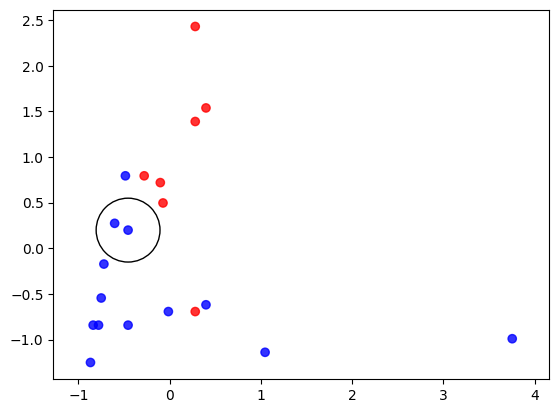

In [130]:
color_map = {4:'Blue', 8:'Red'}
X_kmeans = toy[["sulphates", "alcohol"]]

scaler = StandardScaler().fit(X_kmeans)
X_scaled = scaler.transform(X_kmeans)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=toy['quality'].map(color_map))
plt.axis('equal');


circle = plt.Circle((-0.45638599774909466, 0.1990199164514553), 0.35, fill=False)

ax = plt.gca()
ax.add_patch(circle)

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.2 (2 point)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Show two examples with two different initial cluster assignments that lead to a different result. <br>

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span> <br>
B) How you explain the difference between the two cluster assignments in point A)?

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.3 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **average-link**.

*******************
**YOUR ANSWER HERE**
******************

### Task 1.1.4 (2 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering for the dataset of Task 1.1.1 using $\epsilon=0.35$ and $MinPts=3$. Present at least 2 iterations of the algorithm.<br> 
<font color='red'>**IMPORTANT: For this exercise you can use the DBSCAN from sklearn ONLY TO CHECK YOUR RESULTS**</font>

*******************
**YOUR ANSWER HERE**
******************


B) <span style='color: green'>**\[Describe\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1?

*******************
**YOUR ANSWER HERE**
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Describe\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [ ] Angle based approach
- [ ] Depth based approach

(0.0, 2.0, 0.0, 3.0)

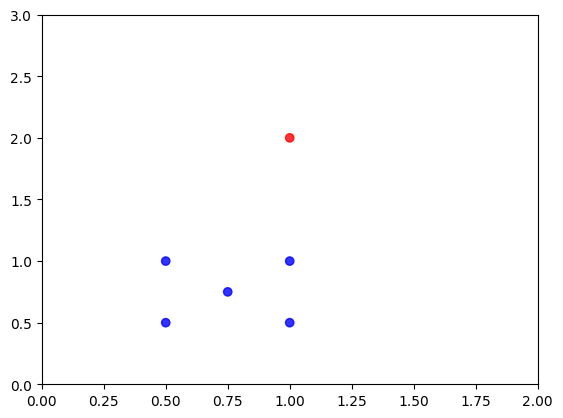

In [131]:
D_new = np.array([[1.0, 2.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0,3])
# circle = plt.Circle((1.0,2.0), 0.2, fill=False)

# ax = plt.gca()
# ax.add_patch(circle)

# plt.show()

*******************
**YOUR ANSWER HERE**
******************

## Task 1.3 Theoretical questions (4 points)
<span style='color: green'>**\[Prove\]**</span> 

1. You are given a measure $d(x,y) = |x-y|$, prove that the measure is a metric 
2. Prove that $\hat{\Sigma}=
\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$

*******************
**YOUR ANSWER HERE**
******************

(1)  
A measure has to satisfy the triangle inequality to be a metric. I.e. we need to prove that
$$|x-z| \le |x-y| + |y-z|$$  
  
Definite: $d(x,y) = |x-y| = 0 \Leftrightarrow x=y $  
Positive semidefinite follows directly from the use of absolute $\forall x,y\quad|x-y|\ge 0$ therefore $d(x,y)\ge 0$  
Symmetry also follows.  


(2)


$\hat{µ}=(\hat{µ_1}, \cdots, \hat{µ_d})^T$ where $\hat{µ_i} =E[X_i] = \frac{1}{n}\sum_j^n x_{i_j}$ where $x_{i_j}$ is the j'th value of attribute $X_i$  
${x_i}=(x_{i1}, \cdots, x_{id})$ 

$$\hat{\Sigma} = \frac{1}{n}\sum_{i=1}^n (x_i-\hat{µ}^T)(x_i-\hat{µ}^T)^T$$
Collapse into the centered data row $\bar{x_i}$ and write out the outer product
$$= \frac{1}{n}\sum_{i=1}^n (\bar{x_i})(\bar{x_i})^T$$
$$=\frac{1}{n}
\begin{bmatrix} 
\sum_{i=1}^n\left(\bar{x_{i_1}}\bar{x_{i_1}}\right) & \cdots &\sum_{i=1}^n\left(\bar{x_{i_1}} \bar{x_{i_d}}\right)\\ 
\vdots & \ddots &\vdots \\
 \sum_{i=1}^n\left(\bar{x_{i_1}}\bar{x_{i_d}}\right)& \cdots &\sum_{i=1}^n\left(\bar{x}_{i_d}\bar{x_{i_d}}\right)
 \end{bmatrix}$$
Where each entry $ij$ is $\bar{X_i}^T\bar{X_J}$.  We can then move $1/n$ into the matrix and expand $\bar{x_i}$ again and get:

$$ =
\begin{bmatrix} 
\frac{1}{n}\sum_{i=1}^n (x_{i_1}-\hat{µ_1})(x_{i_1}-\hat{µ_1}) & \cdots &\frac{1}{n}\sum_{i=1}^n (x_{i_1}-\hat{µ_1})(x_{i_d}-\hat{µ_d})\\ 
\vdots & \ddots &\vdots \\
 \frac{1}{n}\sum_{i=1}^n (x_{i_d}-\hat{µ_d})(x_{i_1}-\hat{µ_1})& \cdots &\frac{1}{n}\sum_{i=1}^n (x_{i_d}-\hat{µ_d})(x_{i_d}-\hat{µ_d})
 \end{bmatrix}$$
Which is the definition of the sample covariance:
$$ =
\begin{bmatrix} 
\hat{\sigma_{11}}& \cdots & \hat{\sigma_{1d}}\\ 
\vdots & \ddots &\vdots \\
\hat{\sigma_{d1}}& \cdots & \hat{\sigma_{dd}}
 \end{bmatrix}$$
Which can also be written as
$$ =
\begin{bmatrix} 
E[(X_1-\hat{µ_1})(X_1-\hat{µ_1})]& \cdots & E[(X_1-\hat{µ_1})(X_d-\hat{µ_d})]\\ 
\vdots & \ddots &\vdots \\
E[(X_d-\hat{µ_d})(X_1-\hat{µ_1})] & \cdots & E[(X_d-\hat{µ_d})(X_d-\hat{µ_d})]
 \end{bmatrix}$$

$$= E[(X-\hat{µ})(X-\hat{µ})^T]$$

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>

This dataset is about red wine variants of the Portuguese "Vinho Verde" wine. It only contains physicochemical and sensory variables, so no prices, grape types and such. Every sample  has also a class of quality which has scores between 1 and 10. It has been used and published with [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016)

In [132]:
toy = wq[wq['quality'].isin([4, 8])]
data_np = toy.to_numpy()
headers = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
X = data_np[:,:10]
y = data_np[:,11]
y = y.astype(int) - 1
rows, cols = np.shape(X)
toy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4


## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

In [133]:
def covar_matrix(X):
    n,d = X.shape
    print(n,d)
    corr = np.zeros((d,d))
    # covar_ij = E[X_i*X_j]-E[X_i]E[X_J]
    # sample covar^_ij= 1/(n-1) \sum (X_i - µ^_i)(X_2 - µ^_2)
    mean = 1/n * np.sum(X, axis = 0)
    sample = X - np.outer(np.ones((n)),mean)
    print(sample.shape)
    covar = 1/n*(sample.T @ sample)
    return covar

71 12
(71, 12)
(12, 12)


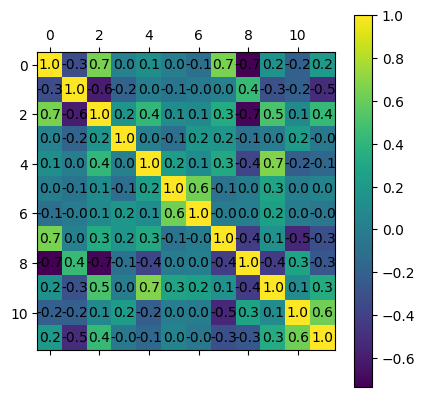

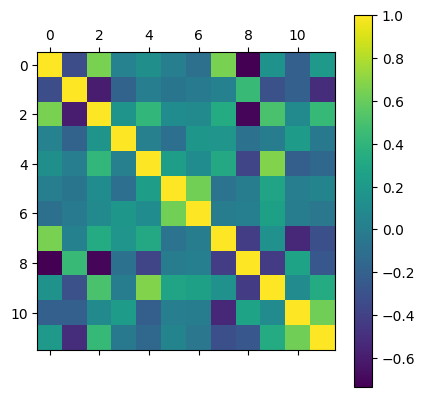

In [134]:
def correlation_matrix(X):
    # YOUR CODE HERE
    n,d = X.shape
    print(n,d)
    corr = np.zeros((d,d))
    # \rho_ij = var_ij / var_i * var_j = var_ij / sqrt(var_i^2 * var_j^2)
    # \rho^_ij = (bar(X_i).T bar(X_j)) / (||bar(X_i)||*||bar(X_j)||)
    # covar_ij = E[X_i*X_j]-E[X_i]E[X_J]
    # sample covar^_ij= 1/(n-1) \sum (X_i - µ^_i)(X_2 - µ^_2)
    mean = 1/n * np.sum(X, axis = 0)
    sample = X - np.outer(np.ones((n)),mean)
    print(sample.shape)
    not_covar = (sample.T @ sample)
    print(not_covar.shape)
    for i in range(d):
        for j in range(d):
            corr[i][j] = (not_covar[i][j])/(np.sqrt(not_covar[i][i])*np.sqrt(not_covar[j][j]))
    # print(n,d)
    # print(mean)
    # print(np.outer(np.ones((n)),mean))
    # YOUR CODE HERE 
    return corr
 
X = data_np
Corr = correlation_matrix(X)
plt.matshow(Corr)
plt.colorbar()

for (i, j), z in np.ndenumerate(Corr):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


plt.matshow(np.corrcoef(X, rowvar=False))
plt.colorbar()

$\hat{µ}= \frac{1}{n}\sum \vec{x}_i$

$\bar{X}_i = X_i - \hat{µ}_i\cdot \vec{1}$  

$\hat{\sigma}_{ij} = \frac{\bar{X}_i^T\bar{X}_j}{n}$

$\hat{\rho}_{ij} = \frac{\hat{\sigma}_{ij}}{\hat{\sigma}_{i}\hat{\sigma}_j} = \frac{\bar{X}^T_i * \bar{X}_j}{\sqrt{\bar{X}_i^T\bar{X}_i}\sqrt{\bar{X}_j^T\bar{X}_j}}= (\frac{\bar{X}_i}{||\bar{X}_i||})^T(\frac{\bar{X}_j}{||\bar{X}_j||})=cos\theta$

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in point A), which pair of different attributes has the highest correlation? <br>

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two attributs are highly correlated? <br>

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the attributes of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.2 (1 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below.
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [ ] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

In [135]:
# sns.heatmap(wq.corr(),annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
# plt.title('Correlation')
# plt.show()

*******************
**YOUR ANSWER HERE**
******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the wine dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

In [136]:
X = data_np
n,d = X.shape
print(X.shape)
import scipy as sp

(71, 12)


(71, 12)
(12,)
(12,)
[[-0.32714822 -0.15160987 -0.68052156  1.04650048  0.01447497]
 [-1.28789739  2.16421583 -0.63489641 -0.70248044  1.3142421 ]
 [ 0.46405697 -0.06583855  0.32323167  0.08154549  0.04470211]
 [-1.90955861 -0.4518095  -0.36114553 -0.34062232 -0.46915931]
 [ 0.18148369  0.21291825  0.14073109 -0.34062232 -0.01575217]]
[[-0.32714822 -0.15160987 -0.68052156  1.04650048  0.01447497]
 [-1.28789739  2.16421583 -0.63489641 -0.70248044  1.3142421 ]
 [ 0.46405697 -0.06583855  0.32323167  0.08154549  0.04470211]
 [-1.90955861 -0.4518095  -0.36114553 -0.34062232 -0.46915931]
 [ 0.18148369  0.21291825  0.14073109 -0.34062232 -0.01575217]]
71 12
(71, 12)
71 12
(71, 12)
71 12
(71, 12)


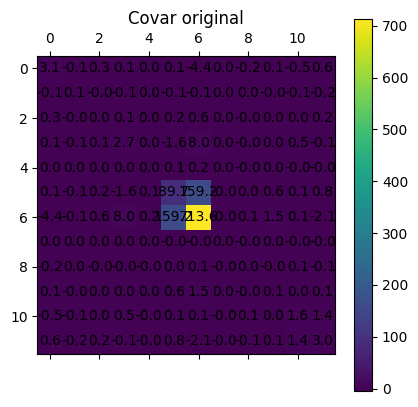

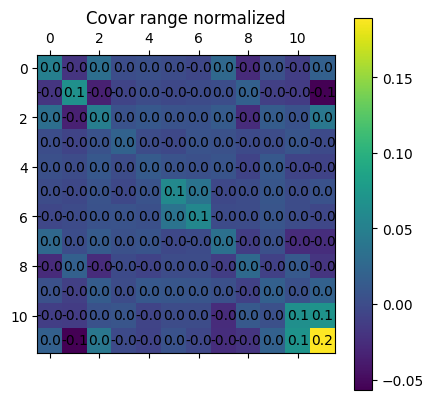

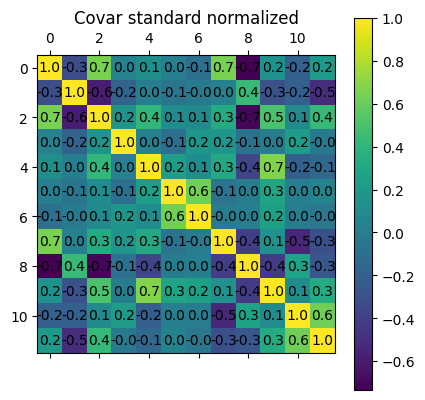

In [137]:
# Data

# YOUR CODE HERE

#Range normalization: xi' = (xi - min_i{xi}) / (max_i{xi} - min_i{xi})
range_norm = np.zeros(X.shape)
print(range_norm.shape)
mins = X.min(axis=0)
maxs = X.max(axis=0)
print(mins.shape)
print(maxs.shape)
ranges = maxs - mins
for i in range(X.shape[0]):
    for j in range(X.shape[1]): #12 #X_J
        range_norm[i][j] = (X[i][j] - mins[j])/(ranges[j])

# YOUR CODE HERE

# Standard Score: xi' = (x'- µ^) / sigma^
standard_norms = np.zeros(X.shape)
means = np.mean(X, axis=0 )

mean = 1/n * np.sum(X, axis = 0)
sample = X - np.outer(np.ones((n)),mean)
covar = 1/n*(sample.T @ sample)
sigmas = np.sqrt(np.diagonal(covar))
# print(sigmas)
#sigma_i = sqrt(1/n sum(x_i - µ^)^2 ) for X_i
# sigmas = sqrt(X_bar^T X_bar)
for i in range(X.shape[0]):
    for j in range(X.shape[1]): #12 #X_J
        standard_norms[i][j] = (X[i][j]-means[j])/(sigmas[j])
print(standard_norms[:5,:5])
print(sp.stats.zscore(X)[:5,:5])

first = covar_matrix(X)
plt.matshow(first)

plt.title("Covar original")
plt.colorbar()
for (i, j), z in np.ndenumerate(first):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


second = covar_matrix(range_norm)
plt.matshow(second)
plt.colorbar()
plt.title("Covar range normalized")
for (i, j), z in np.ndenumerate(second):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

third = covar_matrix(standard_norms)
plt.matshow(third)
plt.title("Covar standard normalized")
plt.colorbar()
for (i, j), z in np.ndenumerate(third):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')





$\hat{\sigma}_i = \sqrt{1/n \sum_j^n (x_j- \hat{µ})^2}$ for $X_i$

### Task 2.1.4 (3 points)
<span style='color: green'>**\[Describe\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other.
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>IMPORTANT: Do NOT just choose one answer. Please clarify WHY this is the correct answer.</font>

*******************
**YOUR ANSWER HERE**
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>IMPORTANT: You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

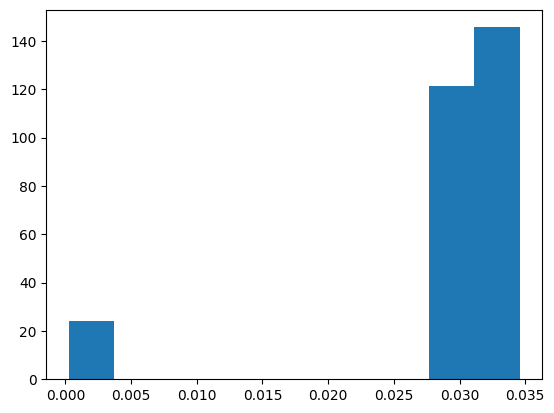

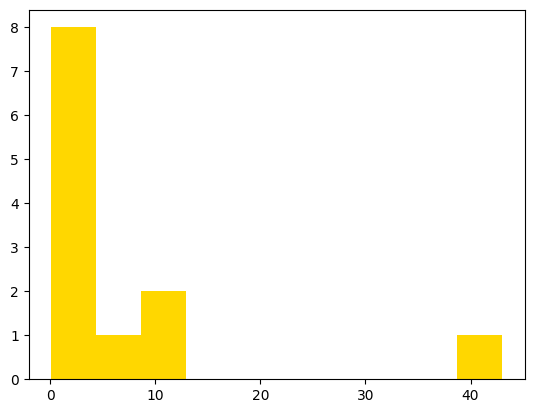

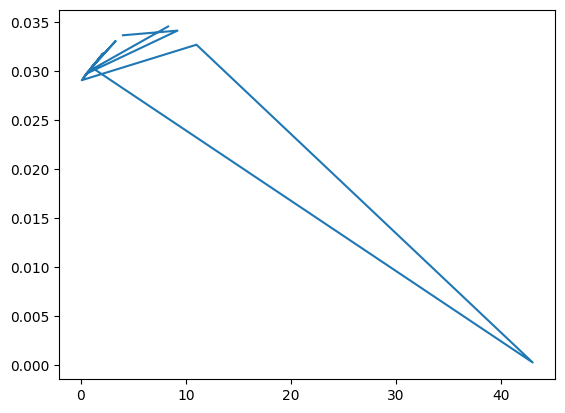

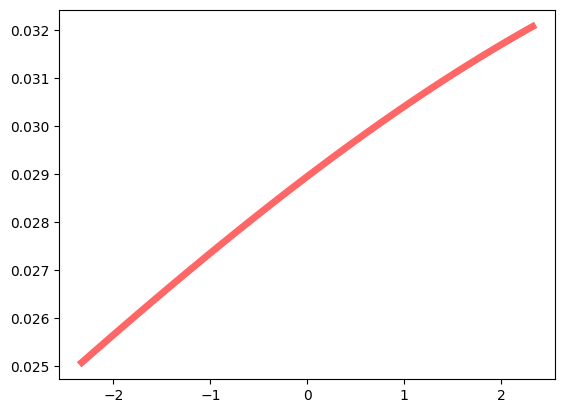

0

In [138]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np
def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE
    mu = sum(x)/len(x)
    sigma2 = np.std(x)
    g = norm.pdf(x, loc=mu, scale=sigma2)
    plt.hist(g, bins=b, density=True)
    plt.show()
    
    plt.hist(x, bins=b,color='gold')
    plt.show()

    reee = norm()
    fig, ax = plt.subplots(1,1)
    ax.plot(x, norm.pdf(x, loc=mu, scale=sigma2))
    plt.show()

    x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
    fig, ax = plt.subplots(1,1)
    ax.plot(x, norm.pdf(x, loc = mu, scale=sigma2),'r-', lw=5, alpha=0.6, label='norm pdf')
    plt.show()
    
    ### YOUR CODE HERE
    return dist

norm_dist(X[4], 10)
#for i in range(X.shape[0]):
    

### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
**YOUR ANSWER HERE**
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [139]:
# YOUR CODE HERE



# YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the attribute features follow a normal distribution?

*******************
**YOUR ANSWER HERE**
******************

### Task 2.2.3 (1 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Describe\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

<Figure size 640x480 with 0 Axes>

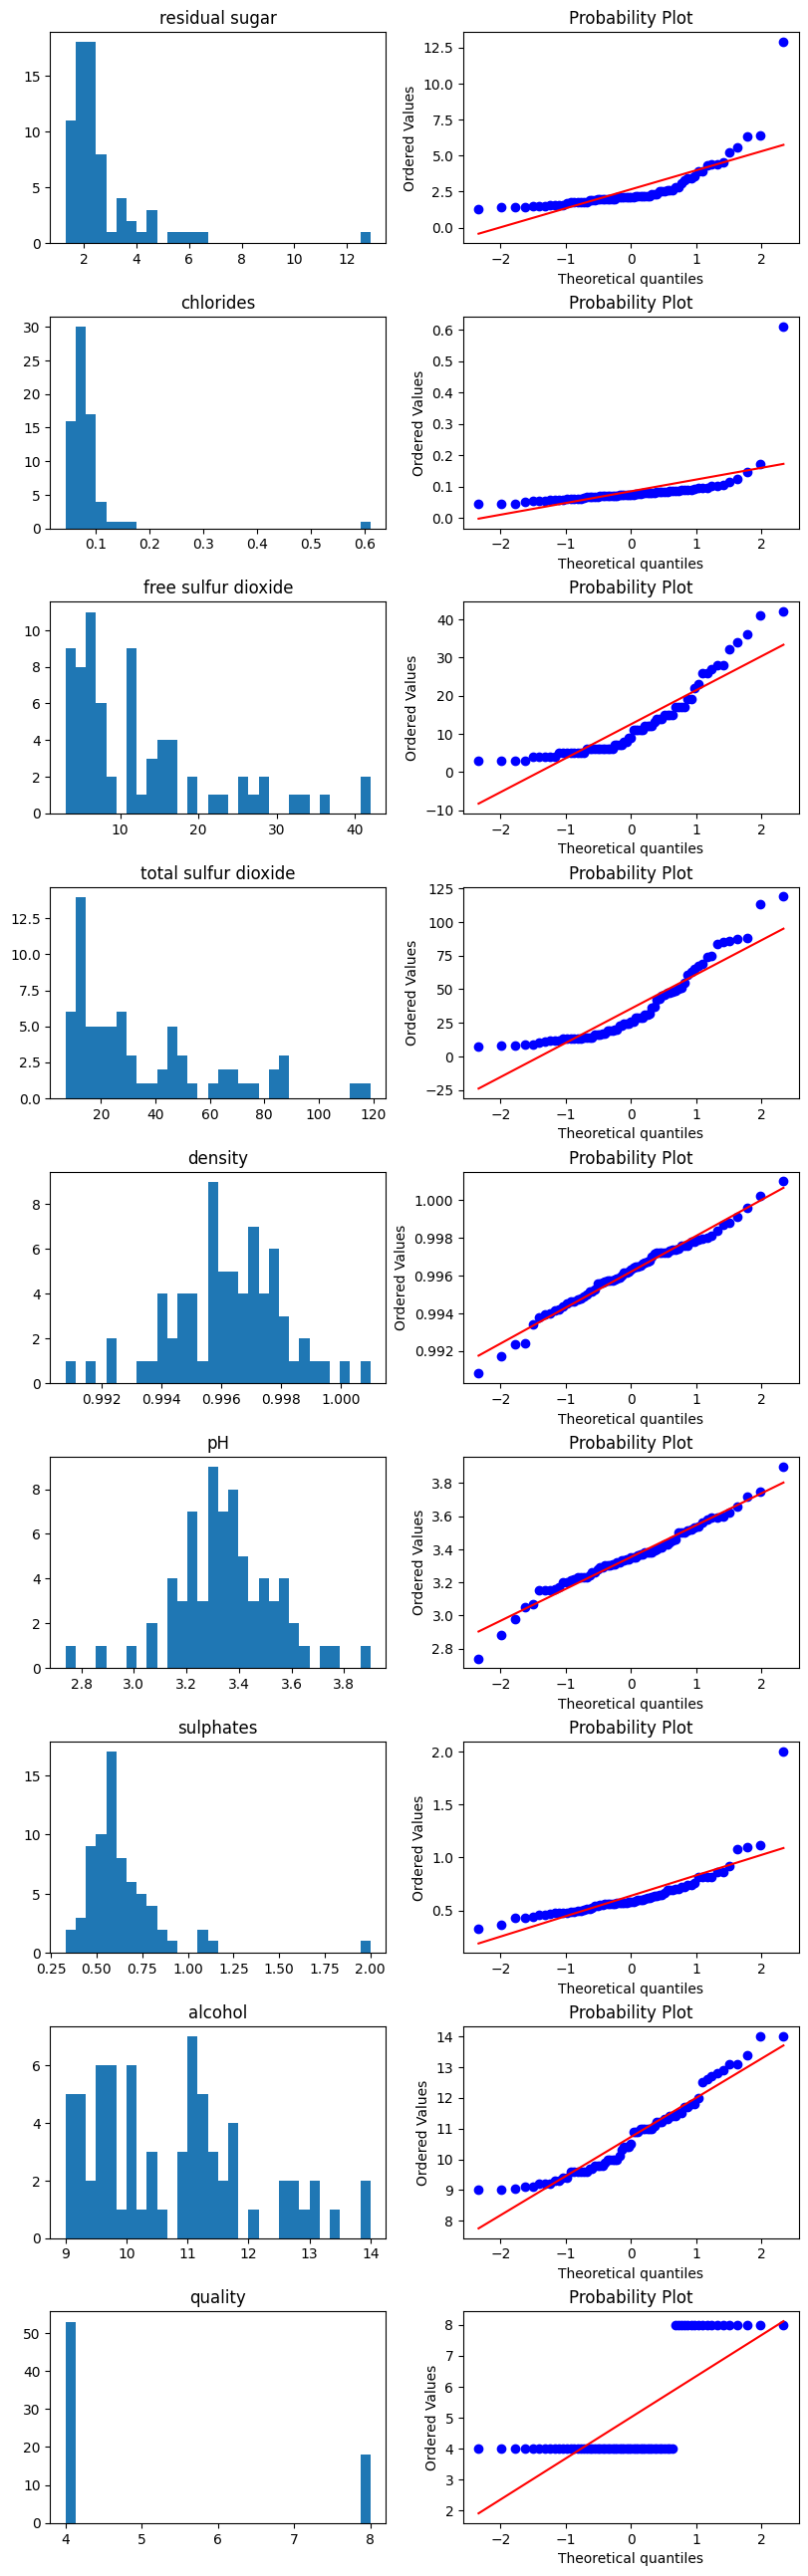

In [140]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape

fig = plt.figure(constrained_layout=True, figsize=(8, 30))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(3,n): 
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
**YOUR ANSWER HERE**
******************

In [141]:
def eu_dist(x,y):
    return (np.sqrt((y[0]-x[0])**2 + (y[1]-x[1])**2))

def find_idx(list, num):
    return [idx for idx, val in enumerate(list) if val == num]

In [142]:
def makeClusterIntoSmaller(C):
    """returns list of [indexes for cluster i], #clusters, [0, #no_cluster), [|Ci|]"""
    cis,mci = np.unique(C,return_counts=True) #returns sorted uniqe values and counts for each
    no_of_c_clusters = len(cis)
    # print(cis)
    # [print(find_idx(C,i)) for i in cis] #make C into lists [c1:[], c2:[], c3:[], ...,cj[]]
    c_clusters = [find_idx(C,i) for i in cis] #make C into lists [c1:[], c2:[], c3:[], ...,cj[]]
    
    return c_clusters, no_of_c_clusters, cis, mci

# print(kmeans.labels_)
# makeClusterIntoSmaller(kmeans.labels_.tolist())

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and plot the **silhouette coefficient** to detect the number of clusters $k$. \n",

Use the "sulphates" and "alcohol" features of the data set.


[2.814090673011696]
[2.0179377834105523]
[2.514178799096761]
[3.4333702491046925]
[2.6130137475202924]
[2.7579382277763704]
[1.3244504655114717]
[2.8009288684741795]
[2.6525133991724323]
[2.815204679509558]
[2.7292408657224527]
[1.7528033198307091]
[1.414233681523777]
[2.411200871172667]
[2.0139196178572427]
[3.142984335619613]
[2.941473055045181]
[3.2395819417872573]
[2.212135441918162]
[2.022150348106245]
[3.7324929766582136]
[2.063364860929288]
[1.3492400440261627]
[1.3492400440261627]
[2.212473602128878]
[1.815668263932168]
[4.332002184221375]
[1.8201079838941572]
[1.6442442215898567]
[1.3485642215370386]
[1.348798152701258]
[2.2124558803773278]
[2.1135269246517225]
[1.5452615963061556]
[1.743105405440973]
[3.036570191076708]
[1.251397227601493]
[1.9284259005218773]
[1.8143620735395138]
[1.2504368046408656]
[2.611166758638759]
[1.4131502358496935]
[2.8359412118764276]
[2.139222530260507]
[3.434177690273219]
[1.8417784107715767]
[1.5493263135729167]
[2.2205588867380475]
[2.041383755

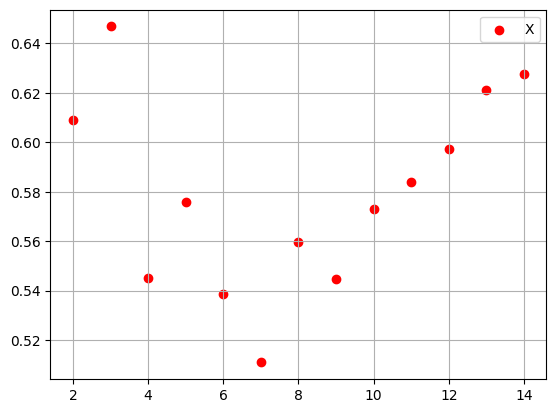

In [143]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
### YOUR CODE HERE


# Mean af alle cluster: dist mellem punkt og alle andre punkt i cluster
def into(o, C:"list[int]",X): #assuming C is list of idx
    sum = 0
    for i in range(len(C)):
        sum += np.linalg.norm(o-X[C[i]], ord=2) 
    return sum/len(C)

def exto(o, C,X): 
    #            X[i]    for idx i in Cj   assuming C is list of lists with indexes
    ee = [ into(o,C[j],X) for j in range(len(C)) ]
    # ee = [ np.sum([dist(x,o) for x in C[j]])*(1/len(C[j])) for j in range(len(C)) ] if C[j] list of points
    # ci = np.argmin(ee)
    print(ee)
    ext_o = np.min(ee)
    return ext_o

def s(o,idx_o, C: "list[list[int]]", X):
    "Returns s(o) for point o"
    # C is list of clusters, find the index of the cluster that contains idx_o
    Cj = [ i for i, x in enumerate(C) if (idx_o in x)][0]
    
    if (len(C[Cj])==1): return 0; #If |C(x)| = 1 then s(x) = 0
    
    other_c = [C[i] for i in range(len(C)) if i!=Cj]
    # print(C[Cj], other_c)

    int_o = into(o,C[Cj],X)
    ext_o = exto(o,other_c,X)
    return np.divide((ext_o-int_o), (np.maximum(ext_o,int_o)))
  

def sc(X: np.ndarray, C):
    n, _ = X.shape
    C2, _, _, _ = makeClusterIntoSmaller(C)
    # print(C2)
    # sc = np.sum([ s(x, idx, C2,X) for idx, x in enumerate(X)])
    return np.mean([ s(x, idx, C2,X) for idx, x in enumerate(X)])
    

# clusters = makeClusterIntoSmaller(C)
#avg af andre cluster, vælg den avg der er mindst ergo det andet cluster der er tættest på


X_norm = (X - X.min(0)) / X.ptp(0)
Y = X_norm
silhouettes = []
### YOUR CODE HERE
# for i in range(2,13):
#     kmeans = KMeans(n_clusters = i, random_state=0, n_init="auto").fit(Y)
#     clusters = kmeans.labels_
#     # print(clusters)
#     sce = sc(Y, clusters)
#     silhouettes.append(sce)


# silhouettes2 = []
# for i in range(2,13):
#     kmeans = KMeans(n_clusters = i, random_state=0, n_init="auto").fit(X)
#     clusters = kmeans.labels_
#     # print(clusters)
#     sce = sc(Y, clusters)
#     silhouettes2.append(sce)


# kmeans = KMeans(n_clusters = 5, random_state=0, n_init="auto").fit(Y)
# clusters = kmeans.labels_
# C3, no_clusters, _, _ = makeClusterIntoSmaller(clusters)
# print(into(X[1],C3[0], Y))

# print(exto(X[1], C3[1:],Y))

# print(s(X[1], 1, C3, Y))


# print(silhouettes)
# x = [2,3,4,5,6,7,8,9,10,11,12]
# plt.scatter(x, silhouettes, label="X_norm")
# plt.scatter(x, silhouettes2, c="r", label="X")
# plt.legend()


numbers = np.arange(2,15, dtype=int)
silhouettes2 = []
for i in numbers:
    kmeans = KMeans(n_clusters = i).fit(X)
    clusters = kmeans.labels_
    sce = sc(X, clusters)
    silhouettes2.append(sce)

print(silhouettes2)
# x = [2,3,4,5,6,7,8,9,10,11,12]
# plt.scatter(x, silhouettes, label="X_norm")
plt.scatter(numbers, silhouettes2, c="r", label="X")
plt.grid()
plt.legend()

[0.06880911187881313, inf]
[0.06880911187881313, inf]
[0.04614440510450838, inf]
[0.04614440510450838, inf]
[0.06024507770561094, inf]
[0.06024507770561094, inf]
[inf, 0.1125579411834491]
[inf, 0.1125579411834491]
[0.06304452589161062, inf]
[0.06304452589161062, inf]
[0.06680095318884886, inf]
[0.06680095318884886, inf]
[0.026471393878629654, inf]
[0.026471393878629654, inf]
[0.06815348823929465, inf]
[0.06815348823929465, inf]
[0.06378791389584454, inf]
[0.06378791389584454, inf]
[0.06885892113886308, inf]
[0.06885892113886308, inf]
[0.06655916502615995, inf]
[0.06655916502615995, inf]
[inf, 0.06527777777777777]
[inf, 0.06527777777777777]
[0.028811845636466816, inf]
[0.028811845636466816, inf]
[0.057214241127145106, inf]
[0.057214241127145106, inf]
[0.0457178570033591, inf]
[0.0457178570033591, inf]
[inf, 0.10484924509757267]
[inf, 0.10484924509757267]
[inf, 0.099204396806185]
[inf, 0.099204396806185]
[inf, 0.10749174530466038]
[inf, 0.10749174530466038]
[0.05156252396412556, inf]
[0.

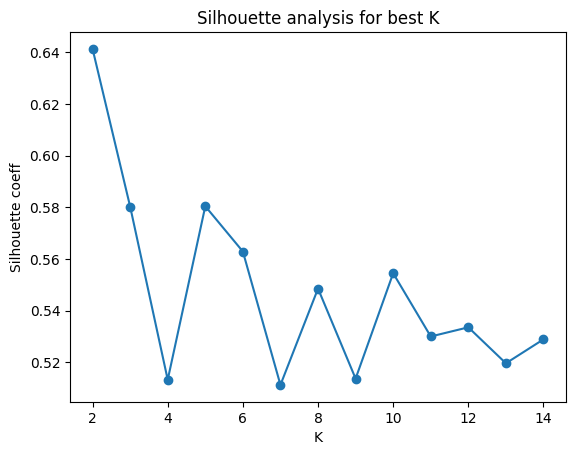

In [144]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
### YOUR CODE HERE
n = X.shape[0]
d = X.shape[1]
assert(d == 2)

interior = np.zeros(n)
exterior = np.zeros(n)

def dist(o,x):
    # euclidean distance / 2-norm
    return np.linalg.norm(o-x, ord=2)

def interior(o, X, C_i):
    sum = 0
    #print(C)
    # print(o)

    #C_i = C[C.index(o)]
    # print(C_i)
    for i in C_i:
        sum = np.sum(dist(X[o],X[i]))
    return sum / len(C_i)

    # C is a list that contains the cluster number for point x_i on index i.
    # assuming o is an index of a point, so x_o
    
    o_cluster = C[o]
    sum = 0
    for idx, cluster_no in C:
        if not cluster_no == o_cluster: continue
        sum = np.sum(dist(X[o],X[idx]))
    #print(C)
    #print([C[i] for i in C if C[i] == o_cluster])
    return sum / len([C[i] for i in C if C[i] == o_cluster])
    

def exterior(o, X, C):
    # C is now a list of lists - index 0 contains the points of C_0 and so on
    cluster_dists = []
    for i, C_i in enumerate(C):
        # print(C_i)
        # we do not want to calculate the distance between o and its own cluster
        if o in C_i:
            # print("o in C_i? " + str(o in C_i))
            cluster_dists.append(np.infty)  
            # print(cluster_dists)
            continue
        # calculate basically the interior if o was a point in C_i
        dist_i = interior(o, X, C_i)
        cluster_dists.append(dist_i)
    print(cluster_dists)
    return np.min(cluster_dists)


    # C is a list that contains the cluster number for point x_i on index i.
    # So C[i] = 5 e.g. means that point x_i has been assigned to cluster 5
    cluster_dists = np.array([np.infty * np.max(C)])

    for i, cluster_no in enumerate(C):
        # we do not want to calculate the distance between o and its own cluster
        if cluster_no == C[o]: 
            continue
        # calculate basically the interior if o was a point in cluster i
        dist_cluster_i = interior(o, X, C)
        cluster_dists[i] = dist_cluster_i
    return np.min(cluster_dists)

def silhouette(o, X, C):
    # print('in silhouette: ' + str(o))
    #ex_o = exterior(o,X,C)
    #in_o = interior(o,X)

    o_cluster_no = [sublist_index for sublist_index, sublist in enumerate(C) if o in sublist]
    C_i = C[o_cluster_no[0]]

    ex_minus_in = exterior(o, X, C) - interior(o, X, C_i)
    in_o = interior(o, X, C_i)
    ex_o = exterior(o, X, C)
    max_ex_and_in = np.max([in_o, ex_o])

    return np.divide(ex_minus_in, max_ex_and_in)

def silhouette_c(X, C):
    silhouette_list = []
    # print("in silhouette_c: " + str(silhouette(5, X, C)))
    silhouette_list = [silhouette(o, X, C) for o in range(n)]
    assert(len(silhouette_list) == len(X))
    # print("silhouette_list: " + str(silhouette_list))
    #print(silhouette_list)
    return np.mean(silhouette_list) # maybe?


# do k-means clustering for different k and plot the silhouette coeff for each of the clusterings:
n_clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13]
silhouette_coeff = []

numbers = np.arange(2,15, dtype=int)

for k in numbers:
    # do k-means
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # print(cluster_labels)

    # transform cluster labels to a list of lists, each containing the indices of the x's that belong to that cluster.
    clustering = []
    for i in range(k):
        xs_in_cluster_i = []
        for j in range(len(cluster_labels)):
            if cluster_labels[j] == i: xs_in_cluster_i.append(j)
        clustering.append(xs_in_cluster_i)
    # print(clustering)

    #clustering = [[i for idx, cluster_no in enumerate(cluster_labels)] if cluster_labels[idx] == cluster_no]
    #print(clustering)

    # calculate and plot avg. silhouette coeff
    silhouette_coeff.append(silhouette_c(X, clustering))

# silhouette_coeff = []
# for i in numbers:
#     kmeans = KMeans(n_clusters = i).fit(X)
#     clusters = kmeans.labels_
#     sce = sc(X, clusters)
#     silhouette_coeff.append(sce)

print(silhouette_coeff)
plt.plot(numbers, silhouette_coeff, 'o-')
plt.xlabel('K') 
plt.ylabel('Silhouette coeff') 
plt.title('Silhouette analysis for best K')
#plt.xlim([0, 11])
plt.show()


B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>IMPORTANT: You can use the KMeans implementation from scikit-learn.</font> <br>

[1 1 1 0 1 3 2 3 3 1 1 4 2 1 2 0 0 0 1 2 0 4 4 4 1 2 0 2 4 4 4 2 1 4 4 0 4
 2 2 4 1 2 0 4 0 4 4 1 4 1 4 1 4 4 1 0 4 1 4 1 2 3 4 4 2 4 2 2 4 1 4]


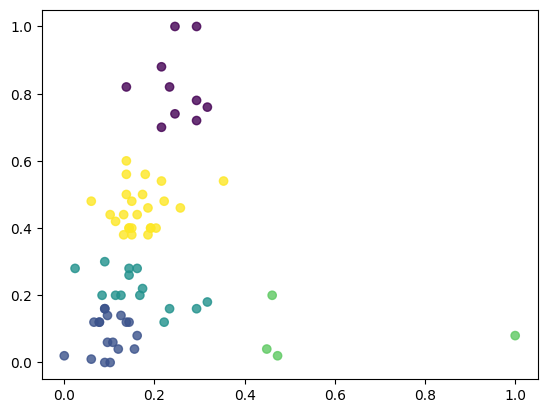

In [145]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)


### YOUR CODE HERE
kmeans = KMeans(n_clusters = 5, random_state=0, n_init="auto").fit(X_norm)


clusters = kmeans.labels_
idxs = [idx for idx, val in enumerate(kmeans.labels_) if val == 3]
# print(idxs)
# print(X_norm[idxs])
points = X_norm[idxs]
#calculate squared norm of cluster means: (1/n_i^2) * sum_xa(sum_xb(K(x_a,x_b)))
n_j = len(points)
# print(n_j)
reee = np.sum([np.sum([(k,u) for k in range(n_j)]) for u in range(n_j)])
# print(reee)
            
print(clusters)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

### Task 3.1.3 (6 points)
<span style='color: green'>**\[Implement\]**</span><br> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 


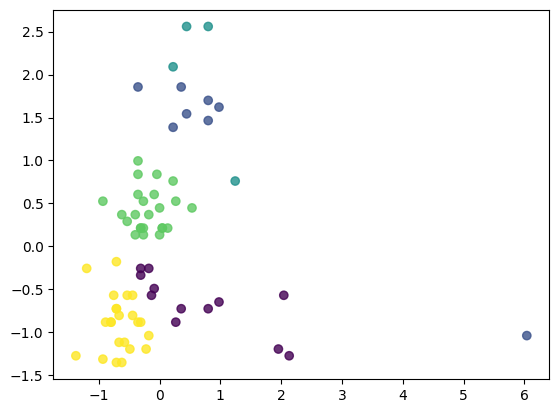

In [146]:
### YOUR CODE HERE
X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.8): 
    k = 0 
    ### YOUR CODE HERE
    dist = eu_dist(x,y)**2
    k = np.exp(-dist/(2*(sigma**2)))

    ### YOUR CODE HERE
    return k

np.random.seed(0)
def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=.01): 
    ### YOUR CODE HERE
    clusters_0 = np.random.randint(n_clusters,size= X.shape[0]) #size k
    # print(clusters_0)
    for t in range(iters): 
        aaa, counts = np.unique(clusters_0, return_counts=True)
        # n_clusters = len(aaa)
        # print(counts, n_clusters)
        #kuhbk
        sqnorms = []
        for i in range(n_clusters):
            idxs = find_idx(clusters_0, i) #points in cluster i
            points = X[idxs]
            #calculate squared norm of cluster means: (1/n_i^2) * sum_xa(sum_xb(K(x_a,x_b)))
            n_j = len(points)
            if(n_j == 0):
                sqnorms.append(0)
                continue
            
            # print(42, i,len(idxs), n_j)
            # TODO: spørg om vi skal inkludere k = u
            reee = np.sum([np.sum([gaussian_kernel(points[k],points[u]) for k in range(n_j) if k!=u]) for u in range(n_j)])
            # print(reee)
            sqnorm = (1/(n_j**2)) * reee
            sqnorms.append(sqnorm)
        
        avg_ji = np.zeros((X.shape[0], n_clusters))
        for idx, x in enumerate(X):
            #calculate avg kernel value for x and C: (1/n_i) * sum_xa(K(xa,xj))
            for i in range(n_clusters):
                idxs = find_idx(clusters_0, i) #points in cluster i
                points = X[idxs]
                n_j = len(points)
                if n_j==0: 
                    avg_ji[idx, i] = 0
                    continue
                #calculate squared norm of cluster means: (1/n_i^2) * sum_xa(sum_xb(K(x_a,x_b)))
                eee = np.sum([gaussian_kernel(x,points[xa]) for xa in range(n_j)])
                avg_ji[idx,i] = 1/(n_j) * eee #FIXME what is n_i
                
        for idx, x in enumerate(X):
            # Find closest cluster for each point
            ds = []
            for i in range(n_clusters):
                a = sqnorms[i] - 2 * avg_ji[idx,i]  
                ds.append(a)
            j_idx = np.argmin(ds)
            clusters_0[idx] = j_idx 
        # print(clusters_0)
    ### YOUR CODE HERE
    return clusters_0

# clusters should be array with values [0,n_clusters) where each value is the cluster the point belongs to
clusters = kernel_kmeans(X_norm, 5)

scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)
clusters = kernel_kmeans(X_scaled, 5)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)


## Task 3.2 Clustering quality

### Task 3.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> **Conditional Entropy (CE)** as a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$.

The **Conditional Entropy** of $T$ **given** $C$ is given by: 
$$\text{CE}(T|C)=-\sum\limits^{|C|}_{i=1}\sum\limits^{|T|}_{j=1}\frac{n_{ij}}{n}\log\frac{n_{ij}}{n_i}$$
where $n_{i}$ is the total number of points in cluster $C_i$ and $n_{ij}$ is the number of common points between clusters $C_i$ and $T_j$


**Hint**: First implement **Entropy** and then **Conditional Entropy**.

In [147]:
def entropy(C):
    # Let C be a list of clusters
    entropy = 0
    ### YOUR CODE HERE
    
    nis = [len(C[i]) for i in range(len(C))]
    n = np.sum(nis)
    pcis = nis/n
    logpcis = np.log(pcis)
    #print(pcis)
    #print(logpcis)
    entropy = - np.dot(pcis,logpcis)
    #print(entropy)
    
    ### YOUR CODE HERE
    return entropy

# TODO: Check hvad fuck de vil have - ligninger stemmer ikk overens
def CE2(C1, C2):
    ce = 0
    
    ### YOUR CODE HERE
    nis = [len(C1[i]) for i in range(len(C1))]
    ### YOUR CODE HERE
    
    return ce

def CE(C, T):
    "Returns conditional entropy between C, T which are assumed to be np.array()"
    ce = 0
    n = len(T.tolist())
    ### YOUR CODE HERE
    t_clusters, no_t, tjs, mtj = makeClusterIntoSmaller(T.tolist())
    c_clusters, no_c, cis, nci = makeClusterIntoSmaller(C.tolist())
    C= c_clusters
    T = t_clusters

    t = len(T)
    c = len(C)
    nij = ([[ [(u in T[j]) for u in C[i] ].count(True) for j in range(no_t)] for i in range(no_c)])
    #print("nij\n",nij)
    #print(nis)
    # wiii = np.array(nij) / np.array(nis)
    nij_ni = [[nij[i][j]/nci[i] for j in range(no_t)] for i in range(no_c)]
    nij_n = [[nij[i][j]/n for j in range(no_t)] for i in range(no_c)]
    #print(nij_ni)
    #print(nij_n)

    #print("wii\n",wiii)
    
    log = lambda x: 0 if(x==0) else np.log2(x)

    #     log(nij/ni)*(nij/ni) for T_j             for C_i
    e = [[log(c[i])*nij_n[idx][i] for i in range(len(c)) ] for idx, c in enumerate(nij_ni)]
    # e = [[log(c[i])*c[i] for i in range(len(c)) ] for c in nij_ni]
    # e = [[c1/t1, ci/t2], [c2/t1, c2/t2], [c3/t1, c3/t2]]
    #print("e",e)
    ce = -(np.sum(e))
    #print("CE: ",ce)
    ### YOUR CODE HERE
    
    return ce   

#Test
# c = [[2,2,3], [1,6,5],[4]]
# entropy(c)
#CE(np.array([[2,3,4]  ,[6,5,1], [8]]),
#    np.array([[1,2,6,7],[4,3,5]]))

#Theirs
X = toy[["sulphates", "alcohol"]].to_numpy()
# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)


### Task 3.2.2 (3 points)
<span style='color: green'>**\[Implement\]**</span>
Plot the Conditional Entropy (implementation from the Task 3.2.1) among the class labels $y$ and the clusters you found with k-means in Task 3.1.1. 
Make sure that the number of clusters and the number of class labels is the same.<br>

In [148]:
class_labels = np.array(toy["quality"])
class_labels = [1 if x == 8 else 0 for x in class_labels] 

###YOUR CODE HERE
num_clusters = 3 # From former task
kmeans = KMeans(num_clusters, random_state=0, n_init="auto").fit(X_norm)

#print(class_labels)
#print(kmeans.labels_)
#print(len(class_labels), len(kmeans.labels_))
print('CE: {}'.format(CE(np.array(class_labels),np.array(kmeans.labels_))))
#CE: 1.1710339601711417

###YOUR CODE HERE

CE: 1.1710339601711417


<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Describe\]**</span><br>
B) What does the measure capture? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span><br>
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth cluster $j$ obtained from the labels $y$.

In [172]:
### YOUR CODE HERE
T = np.array(class_labels) # Ground-truth clusters
C = np.array(kmeans.labels_) # Clusters obtained by k-means
### YOUR CODE HERE

## C is the clustering from k-means and T is the ground truth cluster assignments.
def purity(C, T):
    purity = 0
    ### YOUR CODE HERE
    t_clusters, no_t, tjs, mtj = makeClusterIntoSmaller(T.tolist())
    c_clusters, no_c, cis, nci = makeClusterIntoSmaller(C.tolist())
    # print(t_clusters)
    # print(c_clusters)

    purities = []
    for i in range(no_c):
        #for Ci find intersection with all Tj
        intersects = [list(filter(lambda x: x in c_clusters[i], tj)) for tj in t_clusters]
        # print(i, intersects)
        nij = [len(ls) for ls in intersects]
        factor = 1/nci[i]
        # print("1/",nci[i], "*", np.max(nij))
        purities.append(factor * np.max(nij))
    # print(purities)
    n = len(C)
    # print(nci) #[10 18 14  4 25]
    # print(n) #71
    # print([nci[i]/n * purities[i] for i in range(no_c)]) #[0.14084507042253522, 0.2535211267605634, 0.19718309859154928, 0.056338028169014086, 0.352112676056338]
    purity = np.sum([nci[i]/n * purities[i] for i in range(no_c)])
        

    ### YOUR CODE HERE
    return purity

print('Purity: {}, CE: {}'.format(purity(C,T), CE(C,T)))

Purity: 0.8591549295774648, CE: 0.5437423501677898


### Task 3.2.4 (2 points)
A) <span style='color: green'>**\[Implement\]**</span><br>

Plot the purity of the clusters obtained by k-means in Task 3.1.1. 


In [150]:
### YOUR CODE HERE
X =  toy[["sulphates", "alcohol"]].to_numpy()
### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare purity with **Conditional Entropy (CE)**. Which measure is preferable? (1) Check the correct box below and (2) motivate your answer.

- [ ] **CE** is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [ ] **CE** is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3 OPTICS

### Task 3.3.1 (7 point)
<span style='color: green'>**\[Implement\]**</span> the OPTICS algorithm

If you do not remember [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm), check the slides or the lecture notes. 

In [190]:
import math

UNDEF = -0.001
# Returns list of neighbours
def n_eps(x, eps, points):
    #{p \in D | dist(p,q) <= eps}
    nbh_x = []
    for idx_y,y in enumerate(points):
        if math.dist(x,y) <= eps and math.dist(x,y) !=0:
            nbh_x.append((y,idx_y))
    return nbh_x

def isCore(x, eps, minPts, points):
    return len(n_eps(x, eps, points)) >= minPts

#smallest distance such that x is a core point
def cdist(x, eps, minPts, points):
    isOriginalCore = isCore(x,eps,minPts,points) 
    if(isOriginalCore):
        #look for smaller distances
        eps_star:float = eps

        reee = [math.dist(x,y) for y in X]  
        reee.sort()
        
        while(isCore(x,eps_star,minPts,points)):
            eps_star = eps_star - 0.001                               #FIXME decrease by how much?
        
        return eps_star
    else:
        #no eps* \le eps exists 
        return UNDEF #undefined

def rdist(x,y,eps,min_samples, points):
    ### YOUR CODE HERE
    rdis:float = np.inf
    dist:float = math.dist(x,y)
    cdist_y = cdist(y, eps, min_samples,points)
    
    
    if cdist_y == UNDEF or dist > eps:
         return rdis
    elif dist > cdist_y:
        return dist
    elif dist <= cdist_y:
        return cdist_y
        
    ### YOUR CODE HERE


def optics(X, eps, min_samples): 
    X = X.tolist()
    file = []               #should be ordered output file
    processed = []          #points already seen
    control_list = [];      #well
    for idx, o in enumerate(X):                         #for o in D
        if idx not in processed:
            control_list.append([o,np.inf,idx]) #(x, "?",idx_x)
        while len(control_list) > 0:
            
            control_list.sort(key= lambda a: a[1])      #sort by reach_dist
            
            o, rdist_o, o_idx = control_list.pop(0)               #select first element (o, rdist) from control_list
            nbh_o = n_eps(o,eps,X)                        #Retrieve N_eps(o)

            cdist_o = cdist(o,eps,min_samples,X)          #determine cdist(o)
            
            processed.append(o_idx)                       #o.processed <- true

            file.append((o_idx,rdist_o,cdist_o))          #write to file

            if(cdist_o != UNDEF):
                for p, p_idx in nbh_o:
                    if p_idx not in processed:              #foreach p in N_eps(o) not yet processed
                        rdist_p = rdist(p, o, eps, min_samples,X)         #rdist_p

                        idx_in_control_list = [(idx) for idx, x in enumerate(control_list) if x[2]==p_idx]
                        
                        assert len(idx_in_control_list)<2 
                        
                        if len(idx_in_control_list) == 0:               #if (p,_) notin control_list
                            control_list.append((p, rdist_p, p_idx))                             #insert
                        else:
                            (old, old_rdist_p, idx_p) = control_list[idx_in_control_list[0]]

                            if(rdist_p < old_rdist_p):
                                #add rdist_x instead
                                control_list[idx_in_control_list[0]] = (old, rdist_p,idx_p)      #update
    return file

file = optics(X_norm,0.07,3)
print((file[:10]))
print(len(file))

[(0, inf, 0.04299999999999998), (9, 0.04299999999999998, 0.04899999999999999), (69, 0.04309251804771666, 0.06), (4, 0.04384869299828499, 0.034999999999999976), (2, 0.034999999999999976, 0.05099999999999999), (49, 0.034999999999999976, 0.06), (40, 0.035928143712574814, 0.05099999999999999), (13, 0.05099999999999999, 0.045999999999999985), (18, 0.045999999999999985, 0.04299999999999998), (24, 0.04299999999999998, 0.045999999999999985)]
71


In [153]:
list1 = [(3, "ff"), (4, "ff"), (8, "h"), (9, "itt")]
print((8,"h") not in list1)
print((5,any) not in list1)
# print([print(x) for  x in list1])
print([x[0]==5 for idx, x in enumerate(list1)])
print([(idx) for idx, x in enumerate(list1) if x[0]==8])

False
True
[False, False, False, False]
[2]


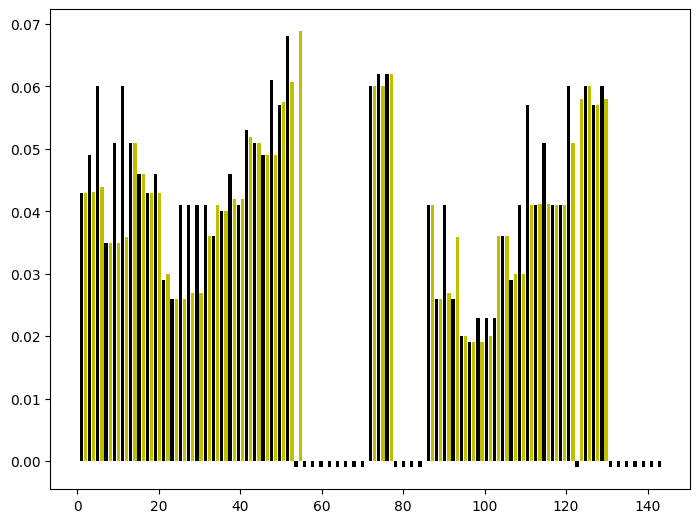

In [191]:
line = np.linspace(0,len(file),num=2*len(file))
line1 = np.linspace(0,2*len(file),num=len(file))
line2 = line1+1

res0 = [i[1] for i in file] #rdist 
res1 = [i[2] for i in file] #cdist
res2 = np.array([[i[1],i[2]] for i in file]).flatten()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(line1,res0, color = 'y')
ax.bar(line2,res1, color='black')
plt.show()

In [210]:
import matplotlib.gridspec as gridspec
X_norm = (X - X.min(0)) / X.ptp(0)
clust = OPTICS(min_samples=3, max_eps=0.07, metric='euclidean')
Y = X_norm
# Run the fit
clust.fit(Y)

# space = np.arange(len(Y))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]
print(len(labels))
print(labels)
print(clust.labels_)

71
[ 0  0  0  1  1  1  1  1  2  2  2  3  3  3  4  4  4 -1 -1 -1 -1 -1  5  5
  5 -1 -1 -1 -1 -1 -1 -1 -1  6  6  6  6  7  7  7  7  7 -1 -1  8  8  8  8
 -1 -1  9  9  9 10 10 10 10 10 11 11 11 -1 -1 -1 12 12 12 -1 -1 -1 -1]
[ 0  3  1 -1  1 -1 -1 -1 -1  0 -1 -1  5  1  6  7  7  7  2  6 -1 -1  8  8
  2 -1 -1 -1 10  9  9  6  2 10 11  7 -1  6 -1 -1  1  5  7 12 -1 11 10  4
 -1  1 11  4 12 10  4 -1 12  3 10  3 -1 -1  8 -1 -1  9 -1  5  8  0 -1]


In [185]:
# X = X_norm

# def optics(X, eps, min_samples):
#     n = X.shape[0]
#     processed = np.zeros(n, dtype=bool) # for checking if a point has been processed
#     reachability = np.full(n, np.inf) # set reachability of all points to infinity
#     controlList  = []
#     finalList = []

    
#     for o in range(n):
#         if not processed[o]:
#             controlList.append([o, reachability[o]])
#         while not len(controlList) == 0:
#             controlList.sort(key=lambda x: x[1])
#             o_idx, o_reachability_distance = controlList.pop(0)
            
#             neighborhood = region_query(o_idx, eps)
#             o_core_distance = core_distance(o_idx, eps, min_samples)
#             processed[o_idx] = True
#             finalList.append([o_idx, o_reachability_distance, o_core_distance])
#             if core_distance(o_idx, eps, min_samples) is not 0:
#                 for p in range(len(neighborhood)):
#                     if not processed[neighborhood[p]]:
#                         point_reachability_distance_op = reachability_distance(neighborhood[p], o_idx, eps, min_samples)
#                         point_indices_in_controlList = [entry[0] for entry in controlList]
#                         if not neighborhood[p] in point_indices_in_controlList:
#                             controlList.append([neighborhood[p], point_reachability_distance_op])
#                         elif neighborhood[p] in point_indices_in_controlList and (controlList[point_indices_in_controlList.index(neighborhood[p])][1] > point_reachability_distance_op):
#                             controlList[point_indices_in_controlList.index(neighborhood[p])] = [neighborhood[p], point_reachability_distance_op]
#     assert(len(finalList) == len(X))
#     return finalList
        
# def core_distance(x_idx, eps, min_pts):
#         dists = [math.dist(X[int(x_idx)], y) for y in X]
#         dists.sort()
#         return dists[min_pts] if dists[min_pts] < eps else 0
    
# def reachability_distance(x_idx, y_idx, eps, min_pts):
#     return np.max([core_distance(y_idx, eps, min_pts), math.dist(X[x_idx], X[y_idx])])
    
# def region_query(x_idx, eps):
#         return [y_idx for y_idx, y in enumerate(X) if math.dist(X[x_idx], y) < eps and not y_idx == x_idx]
# file = optics(X_norm, 0.07,3)
# print(file[:10])

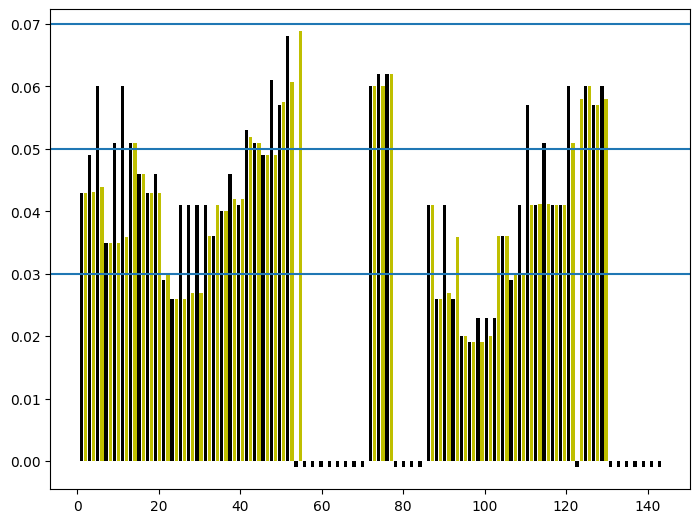

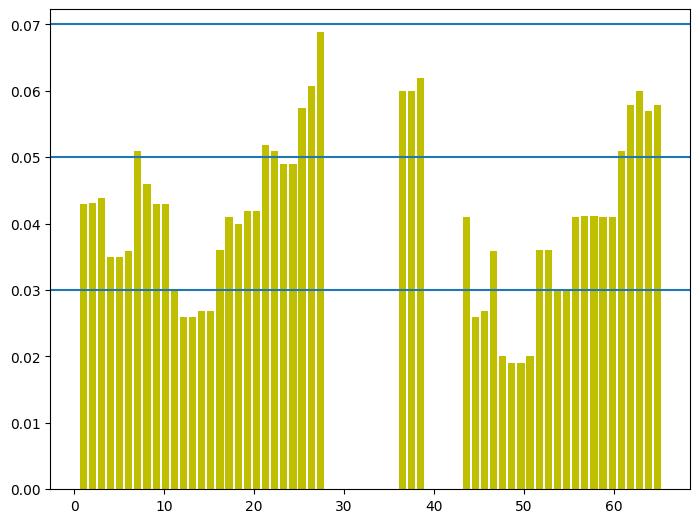

In [192]:
line = np.linspace(0,len(file),num=len(file))
line1 = np.linspace(0,2*len(file),num=len(file))
line2 = line1+1
# print(line1)
# print(line2)
res0 = [i[1] for i in file] #rdist 
res1 = [i[2] for i in file] #cdist
res2 = np.array([[i[1],i[2]] for i in file]).flatten()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(line1,res0, color = 'y')
ax.bar(line2,res1, color='black')
ax.axhline(y=0.07)
ax.axhline(y=0.05)
ax.axhline(y=0.03)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(line,res0, color = 'y')
ax.axhline(y=0.07)
ax.axhline(y=0.05)
ax.axhline(y=0.03)
plt.show()

In [203]:
def makeOpticsClusters(file, eps):
    "take file from optics and threshold eps and return a clustering of list[list[int]] hopefully"
    clusters = []
    i = 0
    while i < len(file):
        idx_o, rdist_o, cdist_o = file[i]
        if(not cdist_o <= eps or not rdist_o > eps ):
            # print(i)
            # clusters.append([i])
            i +=1
            continue
        if(not rdist_o > eps):
            # clusters.append([i]) #FIXME ?????
            # print(i)
            i+=1
            continue
        clust:list[int] = [idx_o]
        # print("i", i)
        for j in range(i+1,len(file)):
            # print(i,j)
            idx_j, rdist_j, cdistj = file[j]
            
            if(rdist_j <= eps):
                clust.append(idx_j)
                # print("i,j",i,j)
            else:
                i=j-1
                # print(j)
                # print("i,j break ",i,j)
                break 
        clusters.append(clust)  
        i +=1
    return clusters 



ree = makeOpticsClusters(file, 0.05)
print(ree)
print(len(np.sum(ree)))
def makeIntoLongClusterList(C,leng):
    "take list[list[int]] and turn into list[int] of lenght leng with 0 for noise"
    clustering_like_others = np.zeros(leng)
    for i in range(len(C)):
        for j in C[i]:
            clustering_like_others[j] = i+1     
    return clustering_like_others
CE(makeIntoLongClusterList(ree, len(file)),np.array(class_labels))

[[0, 9, 69, 4, 2, 49, 40], [13, 18, 24, 32, 57, 1, 59, 51, 54, 47, 27, 25, 38, 64], [67, 41, 12], [10], [60], [3], [5], [7], [8], [11], [14], [15], [42], [19], [20], [21], [22, 62, 23, 68, 39, 29, 30, 65, 36, 58, 53, 33, 46, 28, 70, 34, 45, 50], [63], [56], [26], [31], [37], [44], [55], [61]]
63


0.2723362762404239

### Task 3.3.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
A) Run OPTICS with parameters $\varepsilon=0.07, minPts=3$. <br> 

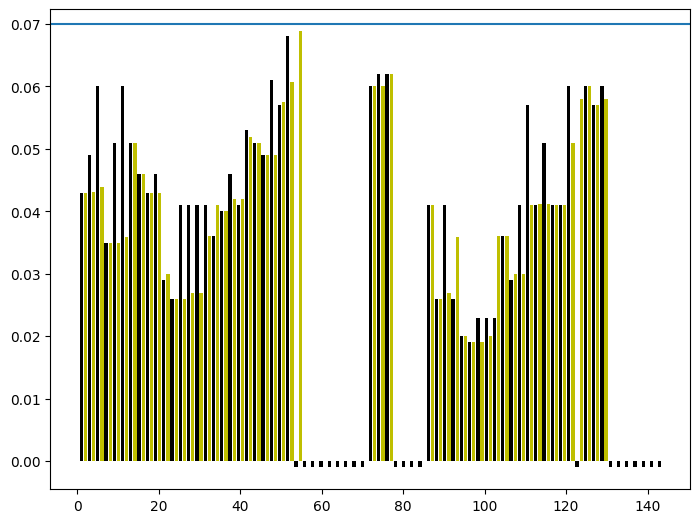

In [194]:
### YOUR CODE HERE
### YOUR CODE HERE
line = np.linspace(0,len(file),num=2*len(file))
line1 = np.linspace(0,2*len(file),num=len(file))
line2 = line1+1
# print(line1)
# print(line2)
res0 = [i[1] for i in file] #rdist 
res1 = [i[2] for i in file] #cdist
res2 = np.array([[i[1],i[2]] for i in file]).flatten()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(line1,res0, color = 'y')
ax.bar(line2,res1, color='black')
ax.axhline(y=0.07)
plt.show()

### YOUR CODE HERE
### YOUR CODE HERE

Text(0.5, 1.0, 'Their Optics')

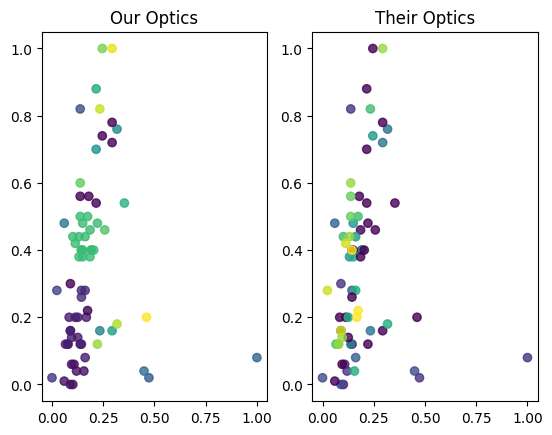

In [212]:
fig, axis = plt.subplots(1, 2)

axis[0].scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=makeIntoLongClusterList(ree, len(file)))
axis[0].set_title("Our Optics")

axis[1].scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=labels)
axis[1].set_title("Their Optics")

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare the results of OPTICS with those of k-means. Which of the two methods two achieve a better **CE**? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3.3 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple subspace clustering algorithm.
1. Take all subsets of 2,3 attributes. Beware that you should only use the numerical attributes.
2. Run OPTICS on each subset. 
3. Compute **CE** for each subset. 
4. Keep the k subsets with the largest **CE**. 
    
<font color='red'>IMPORTANT: You may have to experiment a lot with eps and MinPts to get reasonable clusters. You are allowed to use **itertools** library to iterate over all subsets of size 2 and 3.</font>

In [206]:
# Necessary Data normalization!
X_pt = toy.to_numpy()
X_norm_pt = (X_pt - X_pt.min(0)) / X_pt.ptp(0) 

### YOUR CODE HERE

import itertools
# columns = X_norm_pt.T
# ii = itertools.combinations([[1,2],[3,4],[5,6]],2)
# ij = itertools.combinations([[1,2],[3,4],[5,6]],3)
# print(list(ii))
# print(list(ij))
# combs2 = itertools.combinations(columns, 2)
# combs3 = itertools.combinations(columns, 3)
# print(X_norm_pt.shape)
# print(X_norm_pt.T.shape)
# print(np.array(list(combs2)).shape) #[ [X1, X2],  [X1, X3], ..., [X11, X12] ] where Xi is an array also 
# print(np.array(list(combs3)).shape)
# test = np.arange(1,241).reshape(20,12)
# print(test.T)
# combs = itertools.combinations(test.T, 2)
# print(np.array(list(combs)))

test2 = list(itertools.combinations(np.arange(0,12),2))
print()
optics2 = []
ces2 = []
eps = 0.05
minpts = 3
def run2(k):                    #takes like 20 seconds to run
    for i,j in (test2):
        file = optics(X_norm_pt[:,[i,j]], 0.07, minpts)
        #based on some threshold make some clusters
        optics_clusters:list = makeOpticsClusters(file,0.05)     
        #make the clusters into oné list and give that to CE along with the class labels from before
        ce_ = CE(np.array(makeIntoLongClusterList(optics_clusters,71)),np.array(class_labels)) 
        ces2.append((ce_, (i, j)))
        # optics2.append(file)
    ces2.sort(key= lambda a: a[0],reverse=True)   
    return ces2[:k]  
print(len(ces2))

test3 = list(itertools.combinations(np.arange(0,4),3))
# print(len(test3))220
ces3 = []
def run3(k):
    for i,j,k in (test3):        
        file = optics(X_norm_pt[:,[i,j,k]], eps, minpts)
        optics_clusters = makeOpticsClusters(file,eps)
        ce_ = CE(np.array(optics_clusters),np.array(class_labels))
        ces3.append((ce_, i, j,k))
    ces3.sort(key=lambda a: a[0], reverse=True) #reverse=True means sort in descending order
    return ces3[:k]

res2 = run2(10)
res3 = run3(10)
print(res2)
print(ces3)


0
[(0.7589977395912433, (4, 9)), (0.7263378326790467, (3, 4)), (0.6855871474302531, (4, 8)), (0.6804234809722395, (4, 6)), (0.6668819163638651, (4, 5)), (0.6599803557561597, (0, 4)), (0.605503012321772, (4, 7)), (0.6020712055313104, (2, 4)), (0.588263811181068, (3, 9)), (0.5593115512614014, (1, 4))]
[]


# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [161]:
X_small = toy[["sulphates", "alcohol"]].to_numpy()

X_norm = (X_small - X_small.min(0)) / X_small.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [162]:
def DBOutliers(X, eps, pi): 
    outliers = []
    idx = []
    n, _ = X.shape
    ### YOUR STARTS CODE HERE
    for p in range(n):
        set = []
        for x in range(n):
            if eu_dist(X[p],X[x]) < eps:
                set.append(x)
        # print("set",X[p]," is ", set)
        if len(set)/n <= pi:
            # outliers = np.append(outliers,X[p],axis=0)
            outliers.append(X[p].tolist())
            idx.append(p)

    
    ### YOUR CODE ENDS HERE
    return outliers, idx


test = np.array([[1,1], [2,4], [1,2],[5,5]])
print(DBOutliers(test, 3, 1/2)) #|{}|/4 <= 1/2
# print([[(x.tolist(),y.tolist(),eu_dist(x,y)) for y in test] for x in test])

([[1, 1], [2, 4], [5, 5]], [0, 1, 3])


### Task 4.1.2 (2 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [163]:
### YOUR CODE HERE
### YOUR CODE HERE
print(len(DBOutliers(X_norm, 0.30, 1/8)[0])) #2 outliers
print(len(DBOutliers(X_norm, 0.40, 1/8)[0])) #1 outliers
print(len(DBOutliers(X_norm, 0.80, 1/8)[0])) #0 outliers
print(len(DBOutliers(X_norm, 0.20, 1/8)[0])) #10 outliers

print(len(DBOutliers(X_norm, 0.30, 1/4)[0])) #11 outliers
print(len(DBOutliers(X_norm, 0.30, 1/5)[0])) #9 outliers
print(len(DBOutliers(X_norm, 0.30, 1/6)[0])) #7 outliers
print(len(DBOutliers(X_norm, 0.30, 1/7)[0])) #6 outliers

print(len(DBOutliers(X_norm, 0.50, 1/2)[0])) #8 outliers
print(len(DBOutliers(X_norm, 0.50, 1/4)[0])) #3 outliers
print(len(DBOutliers(X_norm, 0.25, 1/2)[0])) #49 outliers
print(len(DBOutliers(X_norm, 0.25, 1/4)[0])) #13 outliers  (|D'|)/71 <= 1/4 → ~17 x s.t d(p,x)<0.25

### YOUR CODE HERE
### YOUR CODE HERE [[0.4730538922155689, 0.019999999999999928], [1.0, 0.08000000000000007]]

2
1
0
10
11
9
7
6
8
3
49
13


B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
**YOUR ANSWER HERE**
******************

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

A) Propose and <span style='color: green'>**\[Implement\]**</span> a heuristic method to tune parameters eps, pi. 

In [164]:
def tune_dboutliers(X): 
    eps = 0
    pi = 0
    ### YOUR STARTS CODE HERE
    
    
    ### YOUR ENDS CODE HERE
    return eps, pi

B) <span style='color: green'>**\[Describe\]**</span> your algorithm, its main idea, its strengths and its weaknesses

*******************
**YOUR ANSWER HERE**
******************

## Task 4.2 LOF (2 points)
<span style='color: green'>**\[Describe\]**</span><br>
Using the parameters eps=0.18, pi=0.2 compare the results of DBOutliers with those obtained by LOF implemented in Week 9. What outliers do you find?

[2, 3, 3, 4, 6, 7, 7, 7, 7, 7, 9, 9, 8, 11, 15, 15, 13, 13, 13, 13, 13]
21 21


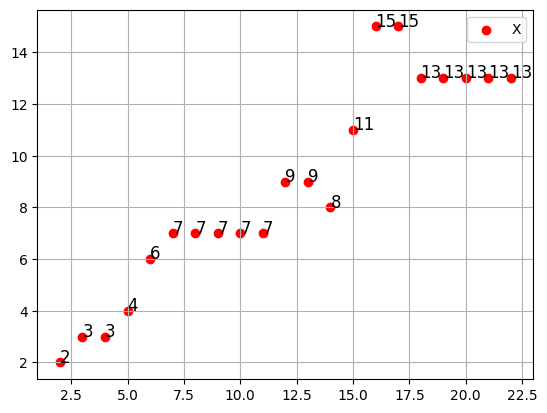

Text(0.5, 1.0, 'LOF')

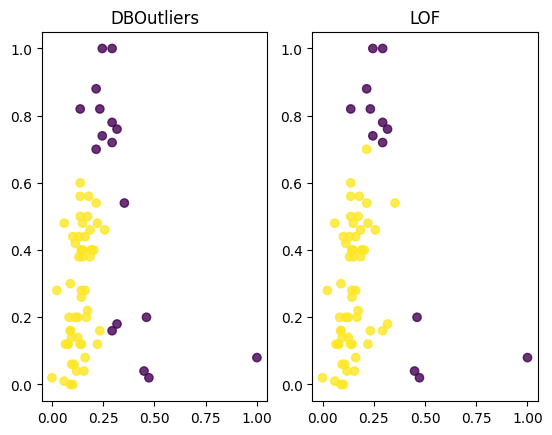

In [207]:
### YOUR CODE HERE

x, idx = DBOutliers(X_norm, 0.18, 0.2)

from sklearn.neighbors import LocalOutlierFactor
y4 = LocalOutlierFactor(n_neighbors=16).fit_predict(X_norm) #FIXME n_neig?
# print(len(list((filter(lambda item: item==-1,y4)))))
# print(find_idx(y4, -1))
# print(len(idx)," DBoutliers: ", idx) #17
# labels = np.zeroes(X_norm.shape[0])
labels = [0 if i in idx else 1 for i in range(len(X_norm))]
# print(labels)
# print()
# print(y4)
# intersects = []
    
numbers = np.arange(2,23, dtype=int)
silhouettes2 = []
_, idx = DBOutliers(X_norm,0.18,0.2)
for i in numbers:
    y4 = LocalOutlierFactor(n_neighbors=i).fit_predict(X_norm) #FIXME n_neig?
    local_idx = find_idx(y4,-1)
    intersection = [ u for u in local_idx if u in idx]
    silhouettes2.append(len(intersection))


print(silhouettes2)
fig, ax = plt.subplots()
print(len(numbers), len(silhouettes2))
plt.scatter(numbers, silhouettes2, c="r", label="X")
for i in range(0,21):
    ax.text(numbers[i], silhouettes2[i], silhouettes2[i], size=12)
plt.grid()
plt.legend()
plt.show()


fig, axis = plt.subplots(1, 2)

axis[0].scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=labels)
axis[0].set_title("DBOutliers")
# plt.show()

axis[1].scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=y4)
axis[1].set_title("LOF")

*******************
**YOUR ANSWER HERE**
******************